<a href="https://colab.research.google.com/github/zoeleroux128/Bias-Report-Updated/blob/main/techtribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install aif360
!pip install fairlearn  # optional for visualization

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -P /tmp/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test -P /tmp/

import pandas as pd

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load training data
df = pd.read_csv('/tmp/adult.data', names=column_names, skipinitialspace=True)

# Inspect head
df.head()


--2025-06-20 08:10:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/tmp/adult.data.3’

adult.data.3            [   <=>              ]   3.79M  8.51MB/s    in 0.4s    

2025-06-20 08:10:50 (8.51 MB/s) - ‘/tmp/adult.data.3’ saved [3974305]

--2025-06-20 08:10:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/tmp/adult.test.3’

adult.test.3            [  <=>               ]   1.91M  5.55MB/s    in 0.3s    

2025-06-20 08:10:51 (5.55 MB/s) - ‘/tmp/adult.tes

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df['race'].value_counts()
# Counts the different races

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


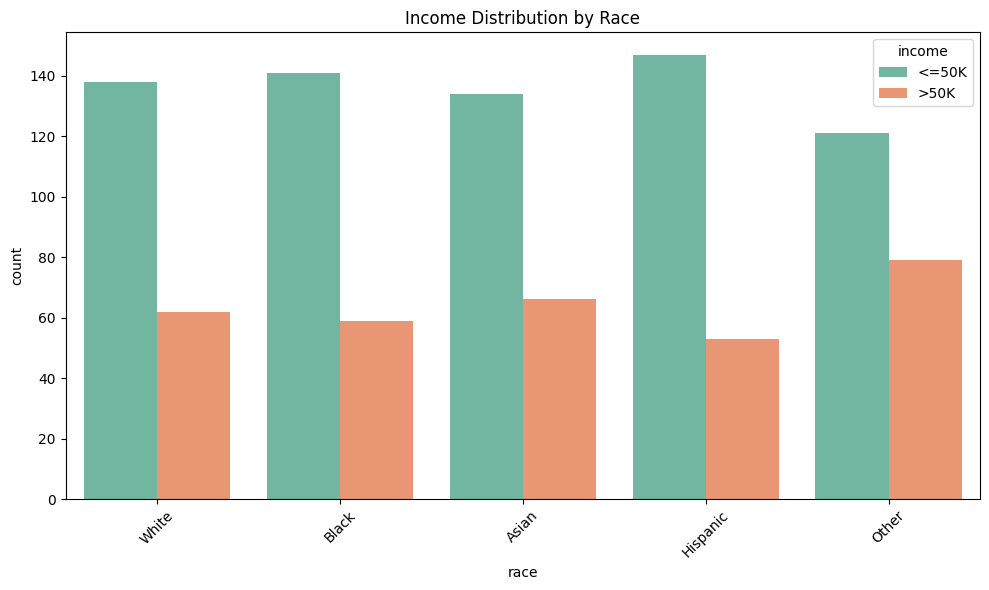

✅ Plot saved to static/plots/race_income_dist.png (for Flask)
📊 Displayed in notebook


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# 1. Create sample data (replace this with your actual data loading if needed)
np.random.seed(42)
races = ['White', 'Black', 'Asian', 'Hispanic', 'Other'] * 200
incomes = np.random.choice(['>50K', '<=50K'], size=1000, p=[0.3, 0.7])
df = pd.DataFrame({
    'race': races,
    'income': incomes
})

# 2. Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income', palette='Set2')
plt.title('Income Distribution by Race')
plt.xticks(rotation=45)
plt.tight_layout()

# 3. Save to static/plots (for Flask)
os.makedirs('static/plots', exist_ok=True)
plot_path = 'static/plots/race_income_dist.png'
plt.savefig(plot_path, bbox_inches='tight', dpi=100)

# 4. Display in notebook
plt.show()

# 5. Clean up
plt.close()

print(f"✅ Plot saved to {plot_path} (for Flask)")
print("📊 Displayed in notebook")

/tmp/ipython-input-6-2879034469.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=race_prop, x='race', y='percent', palette='Set2')


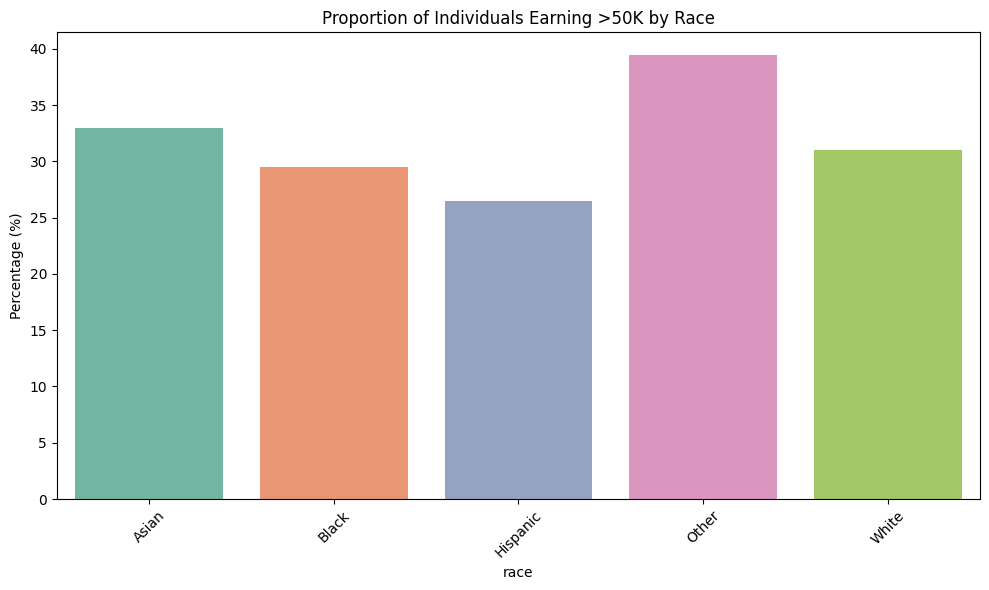

✅ Plot saved to static/plots/race_income_proportion.png (for Flask)
📊 Displayed in notebook


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 1. Ensure the static/plots directory exists
os.makedirs('static/plots', exist_ok=True)

# 2. Prepare the data (using your existing code)
race_income = df.groupby(['race', 'income']).size().reset_index(name='count')
race_totals = race_income.groupby('race')['count'].transform('sum')
race_income['percent'] = race_income['count'] / race_totals * 100
race_prop = race_income[race_income['income'] == '>50K']

# 3. Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=race_prop, x='race', y='percent', palette='Set2')
plt.title('Proportion of Individuals Earning >50K by Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# 4. Save to the correct directory for Flask
plot_path = 'static/plots/race_income_proportion.png'
plt.savefig(plot_path, bbox_inches='tight', dpi=100)

# 5. Display in notebook
plt.show()

# 6. Clean up
plt.close()

print(f"✅ Plot saved to {plot_path} (for Flask)")
print("📊 Displayed in notebook")

In [6]:
# Strip whitespace from string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Fix income labels if necessary (sometimes test data has '.' at the end)
df['income'] = df['income'].str.replace('.', '', regex=False)

# Map income to binary
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Map sex to binary
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Check for missing values
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
from aif360.datasets import StandardDataset
import pandas as pd # Import pandas if not already imported

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status',
                                       'occupation', 'relationship', 'race',
                                       'native-country'], drop_first=True) # drop_first=True to avoid multicollinearity

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

# Create the StandardDataset using the encoded DataFrame
dataset = StandardDataset(df_encoded,
                          label_name='income',
                          favorable_classes=[1],
                          protected_attribute_names=['sex'], # 'sex' is now a numerical column
                          privileged_classes=[[1]])

# You might need to redefine privileged and unprivileged groups if you one-hot encoded the protected attribute
# If 'sex' was one-hot encoded into 'sex_Male' and 'sex_Female',
# you would need to adjust privileged_groups and unprivileged_groups accordingly,
# for example:
# privileged_groups = [{'sex_Male': 1}]
# unprivileged_groups = [{'sex_Male': 0}] # Or [{'sex_Female': 1}] depending on your encoding and preference

# However, since we mapped 'sex' to 0 and 1 earlier, we can keep it as a single column and the original groups are fine.

print("Dataset created successfully:")
print(dataset)


Dataset created successfully:
               instance weights features                          \
                                                                   
                                     age    fnlwgt education-num   
instance names                                                     
0                           1.0     39.0   77516.0          13.0   
1                           1.0     50.0   83311.0          13.0   
2                           1.0     38.0  215646.0           9.0   
3                           1.0     53.0  234721.0           7.0   
4                           1.0     28.0  338409.0          13.0   
...                         ...      ...       ...           ...   
32556                       1.0     27.0  257302.0          12.0   
32557                       1.0     40.0  154374.0           9.0   
32558                       1.0     58.0  151910.0           9.0   
32559                       1.0     22.0  201490.0           9.0   
32560             

In [8]:
from aif360.metrics import BinaryLabelDatasetMetric

metric = BinaryLabelDatasetMetric(dataset,
                                  privileged_groups=privileged_groups,
                                  unprivileged_groups=unprivileged_groups)

print("Statistical Parity Difference:", metric.statistical_parity_difference())
print("Disparate Impact:", metric.disparate_impact())


pip install 'aif360[inFairness]'


Statistical Parity Difference: -0.19627598779361352
Disparate Impact: 0.3580225496813511


--2025-06-20 08:25:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/tmp/adult.data.5’

adult.data.5            [  <=>               ]   3.79M  8.95MB/s    in 0.4s    

2025-06-20 08:25:59 (8.95 MB/s) - ‘/tmp/adult.data.5’ saved [3974305]

--2025-06-20 08:25:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/tmp/adult.test.5’

adult.test.5            [  <=>               ]   1.91M  5.01MB/s    in 0.4s    

2025-06-20 08:26:00 (5.01 MB/s) - ‘/tmp/adult.tes

pip install 'aif360[inFairness]'


Statistical Parity Difference: -0.19627598779361352
Disparate Impact: 0.3580225496813511


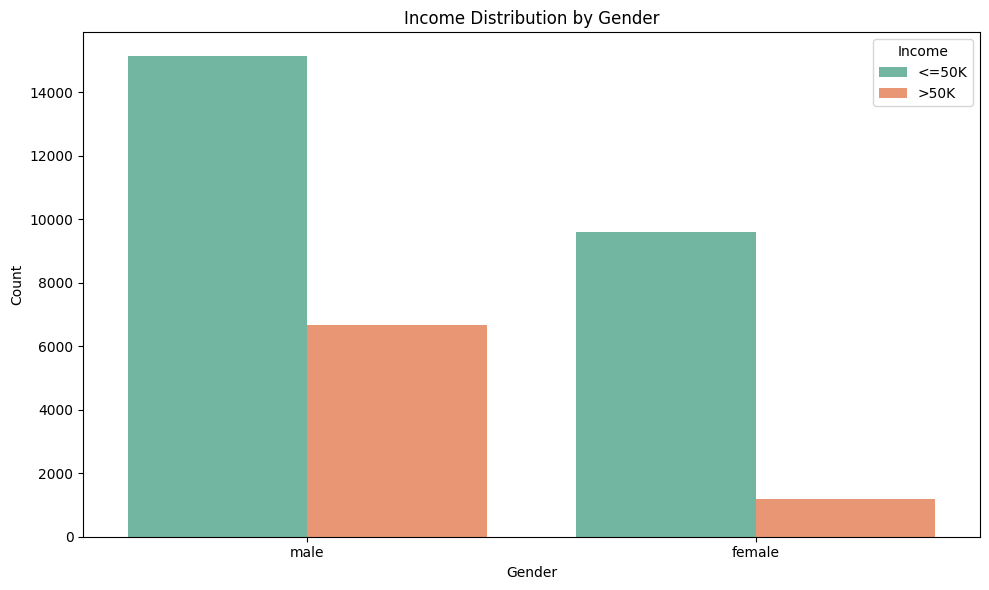

In [8]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install aif360
!pip install fairlearn  # optional for visualization
# %%
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -P /tmp/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test -P /tmp/

import pandas as pd

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load training data
df = pd.read_csv('/tmp/adult.data', names=column_names, skipinitialspace=True)

# Inspect head
df.head()

# %%
# Create a copy for visualization *before* converting 'sex' to binary in the main df
df_viz = df.copy()

# Strip whitespace from string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Fix income labels if necessary (sometimes test data has '.' at the end)
df['income'] = df['income'].str.replace('.', '', regex=False)

# Map income to binary
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Map sex to binary for aif360
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Check for missing values
print(df.isnull().sum())

# %%
from aif360.datasets import StandardDataset
import pandas as pd # Import pandas if not already imported

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status',
                                       'occupation', 'relationship', 'race',
                                       'native-country'], drop_first=True) # drop_first=True to avoid multicollinearity

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

# Create the StandardDataset using the encoded DataFrame
dataset = StandardDataset(df_encoded,
                          label_name='income',
                          favorable_classes=[1],
                          protected_attribute_names=['sex'], # 'sex' is now a numerical column
                          privileged_classes=[[1]])

# You might need to redefine privileged and unprivileged groups if you one-hot encoded the protected attribute
# If 'sex' was one-hot encoded into 'sex_Male' and 'sex_Female',
# you would need to adjust privileged_groups and unprivileged_groups accordingly,
# for example:
# privileged_groups = [{'sex_Male': 1}]
# unprivileged_groups = [{'sex_Male': 0}] # Or [{'sex_Female': 1}] depending on your encoding and preference

# However, since we mapped 'sex' to 0 and 1 earlier, we can keep it as a single column and the original groups are fine.

print("Dataset created successfully:")
print(dataset)

# %%
from aif360.metrics import BinaryLabelDatasetMetric

metric = BinaryLabelDatasetMetric(dataset,
                                  privileged_groups=privileged_groups,
                                  unprivileged_groups=unprivileged_groups)

print("Statistical Parity Difference:", metric.statistical_parity_difference())
print("Disparate Impact:", metric.disparate_impact())

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# The df_viz DataFrame was created earlier before the 'sex' column was mapped to binary.
# It still contains the original string values ('Male', 'Female').

# Ensure 'sex' is cleaned and consistent for visualization
df_viz['sex'] = df_viz['sex'].str.strip().str.lower()

# Clean and binarize 'income' for visualization labels
df_viz['income'] = df_viz['income'].apply(lambda x: '>50K' if '>50K' in str(x) else '<=50K')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viz, x='sex', hue='income', palette='Set2')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.savefig('static/plots/plot1.png', bbox_inches='tight', dpi=100)
plt.show()
plt.close() # close plot so it doesn't display here if you don't want it


<Figure size 1000x600 with 0 Axes>

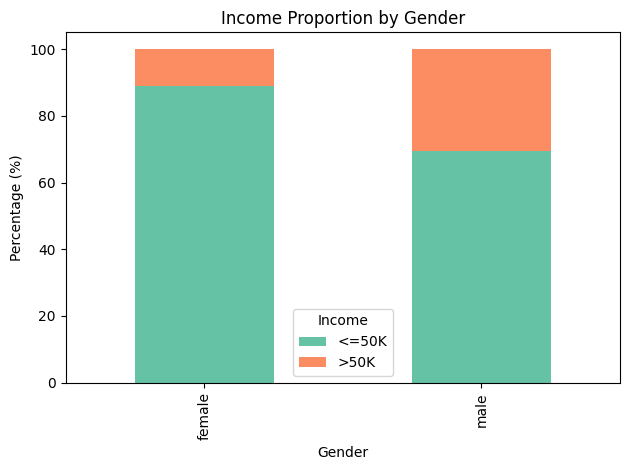

In [9]:
# Calculate percentage of each income class within each gender
# 2. Income Proportion by Gender
gender_income = df_viz.groupby(['sex', 'income']).size().unstack()
gender_income_pct = gender_income.div(gender_income.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
gender_income_pct.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
plt.title('Income Proportion by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Income')
plt.tight_layout()
plt.savefig('static/plots/plot2.png', bbox_inches='tight', dpi=100)
plt.show()
plt.close()

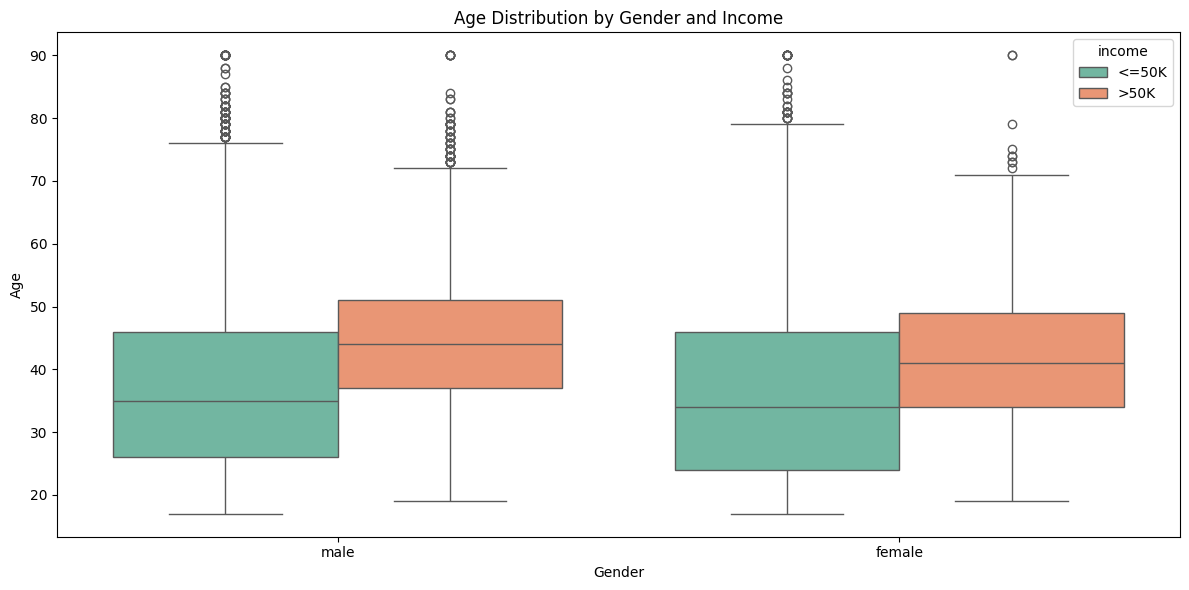

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_viz, x='sex', y='age', hue='income', palette='Set2')
plt.title('Age Distribution by Gender and Income')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('static/plots/plot3.png', bbox_inches='tight', dpi=100)
plt.show()
plt.close()

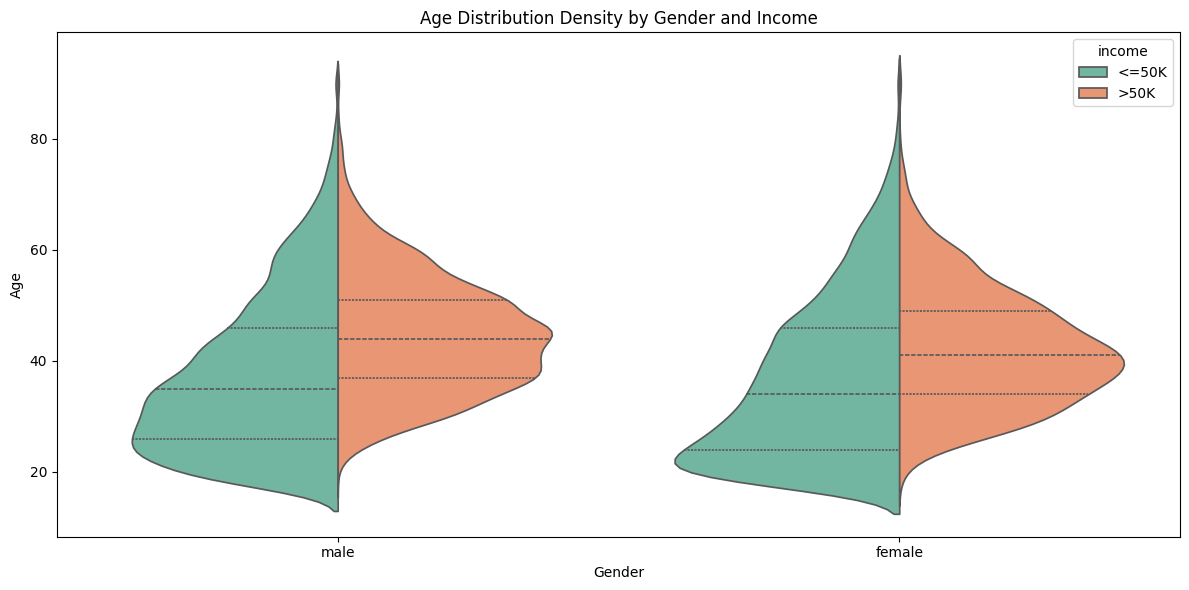

In [11]:
 #Violin Plot: Age vs Income by Gender
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_viz, x='sex', y='age', hue='income',
               palette='Set2', split=True, inner='quartile')
plt.title('Age Distribution Density by Gender and Income')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('static/plots/plot4.png', bbox_inches='tight', dpi=100)
plt.show()
plt.close()

Data overview:
   age     sex income
0   39    Male  <=50K
1   50    Male  <=50K
2   38    Male  <=50K
3   53    Male  <=50K
4   28  Female  <=50K

Creating age bins...

Age bin counts:
age_bin
(15, 20]    2410
(20, 25]    4001
(25, 30]    4161
(30, 35]    4353
(35, 40]    4193
(40, 45]    3816
(45, 50]    3167
(50, 55]    2371
(55, 60]    1757
(60, 65]    1174
(65, 70]     618
(70, 75]     299
(75, 80]     142
(80, 85]      51
(85, 90]      48
(90, 95]       0
Name: count, dtype: int64

Plotting data sample:
    age_bin     sex  percentage
0  (15, 20]  Female    0.085251
1  (15, 20]    Male    0.080841
2  (20, 25]  Female    1.881068
3  (20, 25]    Male    3.442414
4  (25, 30]  Female    8.762170
5  (25, 30]    Male   16.232097
6  (30, 35]  Female   13.899614
7  (30, 35]    Male   27.567037
8  (35, 40]  Female   18.017309
9  (35, 40]    Male   39.493498


/tmp/ipython-input-14-1121679732.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (age_bin, sex), group in df_viz.groupby(['age_bin', 'sex']):



✅ Plot successfully saved to static/plots/plot5.png


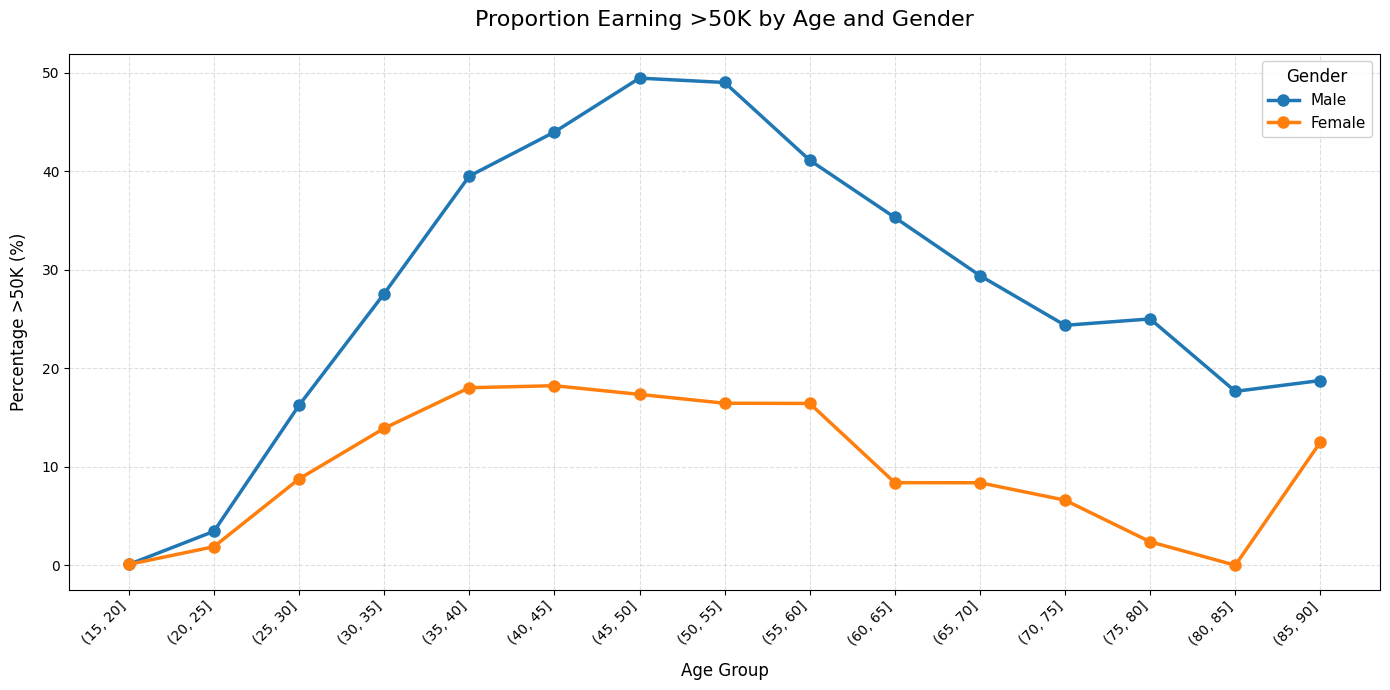

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for plots
os.makedirs('static/plots', exist_ok=True)

# Load and prepare data
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Download data if not already present
if not os.path.exists('/tmp/adult.data'):
    !wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -P /tmp/

df = pd.read_csv('/tmp/adult.data', names=column_names, skipinitialspace=True)

# Clean data
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Create visualization copy BEFORE any transformations
df_viz = df.copy()

# Prepare numerical version for analysis
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Ensure df_viz has clean income labels
df_viz['income'] = df_viz['income'].str.replace('.', '')

# Debug: Check data
print("Data overview:")
print(df_viz[['age', 'sex', 'income']].head())

# Plot 5: Fixed version with data verification
print("\nCreating age bins...")
df_viz['age_bin'] = pd.cut(df_viz['age'], bins=range(15, 100, 5))

# Verify we have data in each bin
print("\nAge bin counts:")
print(df_viz['age_bin'].value_counts().sort_index())

# Calculate percentages - robust method
results = []
for (age_bin, sex), group in df_viz.groupby(['age_bin', 'sex']):
    total = len(group)
    over_50k = sum(group['income'] == '>50K')
    if total > 0:
        results.append({
            'age_bin': age_bin,
            'sex': sex,
            'percentage': (over_50k / total) * 100
        })

plot_data = pd.DataFrame(results)

# Debug: Show plotting data
print("\nPlotting data sample:")
print(plot_data.head(10))

# Create the plot with enhanced styling
plt.figure(figsize=(14, 7))
for gender in ['Male', 'Female']:
    subset = plot_data[plot_data['sex'] == gender]
    if not subset.empty:
        plt.plot(subset['age_bin'].astype(str), subset['percentage'],
                label=gender, marker='o', markersize=8, linewidth=2.5)

plt.title('Proportion Earning >50K by Age and Gender', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=12, labelpad=10)
plt.ylabel('Percentage >50K (%)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', title_fontsize=12, fontsize=11, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Save and show
plt.savefig('static/plots/plot5.png', bbox_inches='tight', dpi=150, facecolor='white')
print("\n✅ Plot successfully saved to static/plots/plot5.png")
plt.show()
plt.close()


In [14]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import StandardDataset
import pandas as pd # Ensure pandas is imported

# Create a BinaryLabelDataset
dataset = StandardDataset(
    df_encoded,
    label_name='income',
    favorable_classes=[1],  # Change this from '>50K' to 1
    protected_attribute_names=['sex'],
    privileged_classes=[[1]],  # Male
    features_to_drop=[]
)

# Apply reweighing
RW = Reweighing(unprivileged_groups=[{'sex': 0}], privileged_groups=[{'sex': 1}])
dataset_transf = RW.fit_transform(dataset)

# View updated instance weights
print("Original weights:", dataset.instance_weights[:10])
print("Reweighted:", dataset_transf.instance_weights[:10])


Original weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Reweighted: [1.09351928 1.09351928 1.09351928 1.09351928 0.85250628 0.85250628
 0.85250628 0.78763738 2.19996586 0.78763738]


In [15]:
from aif360.metrics import BinaryLabelDatasetMetric

# Re-evaluate fairness metrics on the reweighted dataset
metric_transf = BinaryLabelDatasetMetric(
    dataset_transf,
    unprivileged_groups=[{'sex': 0}],
    privileged_groups=[{'sex': 1}]
)

print("After Reweighing:")
print("Statistical Parity Difference:", metric_transf.statistical_parity_difference())
print("Disparate Impact:", metric_transf.disparate_impact())


After Reweighing:
Statistical Parity Difference: 2.7755575615628914e-17
Disparate Impact: 1.0000000000000002


In [16]:
from aif360.datasets import StandardDataset
import pandas as pd # Import pandas if not already imported

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status',
                                       'occupation', 'relationship', 'race',
                                       'native-country'], drop_first=True) # drop_first=True to avoid multicollinearity

# The rest of the code in this cell defines the dataset for aif360,
# which relies on df_encoded.
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

# Create the StandardDataset using the encoded DataFrame
dataset = StandardDataset(df_encoded,
                          label_name='income',
                          favorable_classes=[1],
                          protected_attribute_names=['sex'], # 'sex' is now a numerical column
                          privileged_classes=[[1]])

# You might need to redefine privileged and unprivileged groups if you one-hot encoded the protected attribute
# If 'sex' was one-hot encoded into 'sex_Male' and 'sex_Female',
# you would need to adjust privileged_groups and unprivileged_groups accordingly,
# for example:
# privileged_groups = [{'sex_Male': 1}]
# unprivileged_groups = [{'sex_Male': 0}] # Or [{'sex_Female': 1}] depending on your encoding and preference

# However, since we mapped 'sex' to 0 and 1 earlier, we can keep it as a single column and the original groups are fine.

print("Dataset created successfully:")
print(dataset)

Dataset created successfully:
               instance weights features                          \
                                                                   
                                     age    fnlwgt education-num   
instance names                                                     
0                           1.0     39.0   77516.0          13.0   
1                           1.0     50.0   83311.0          13.0   
2                           1.0     38.0  215646.0           9.0   
3                           1.0     53.0  234721.0           7.0   
4                           1.0     28.0  338409.0          13.0   
...                         ...      ...       ...           ...   
32556                       1.0     27.0  257302.0          12.0   
32557                       1.0     40.0  154374.0           9.0   
32558                       1.0     58.0  151910.0           9.0   
32559                       1.0     22.0  201490.0           9.0   
32560             

In [17]:
!pip install flask pyngrok


In [18]:
!ngrok authtoken 2yiWBNL7OFSC8GPFaOHGhfPufWc_57GZ1pQ5zDC84Ydrq4mE5


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
from flask import Flask
from pyngrok import ngrok
import threading

# Start Flask app
app = Flask(__name__)

@app.route('/')
def index():
    return "<h1>✅ Your Flask App is Running!</h1>"

def run_app():
    app.run(port=5000)

# Expose the Flask app via ngrok
public_url = ngrok.connect(5000)
print("🌍 Public URL:", public_url)

# Start the Flask app in a background thread
thread = threading.Thread(target=run_app)
thread.start()


🌍 Public URL: NgrokTunnel: "https://f494-34-121-194-5.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


In [20]:
import os
print(os.listdir('.'))


['.config', 'plot2.png', 'static', 'plot3.png', 'race_income_dist.png', 'race_income_proportion.png', 'plot1.png', 'plot5.png', 'plot4.png', 'sample_data']


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [1]:
!pip install fpdf

In [1]:
import os
import tempfile
import traceback
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from flask import Flask, render_template_string, send_file, url_for, send_from_directory
from pyngrok import ngrok
from fpdf import FPDF

# Disable matplotlib figure warning
rcParams['figure.max_open_warning'] = 0

# First create the Flask app
app = Flask(__name__, static_folder='static')

# Create static/plots directory
os.makedirs('static/plots', exist_ok=True)

# --- Data setup ---
metrics_df = pd.DataFrame({
    'Metric': [
        'Statistical Parity Difference',
        'Disparate Impact',
        'Equal Opportunity Difference',
        'Average Odds Difference'
    ],
    'Before Mitigation': [0.35, 0.5, 0.25, 0.22],
    'After Mitigation': [0.15, 0.75, 0.10, 0.12],
    'Explanation': [
        'Difference in favorable outcome rates between groups (0 means no bias)',
        'Ratio of favorable outcomes; 1 means parity',
        'Difference in true positive rates between groups',
        'Average difference of false positive and true positive rates'
    ]
})

fairness_thresholds = {
    'Statistical Parity Difference': 0.1,
    'Disparate Impact': (0.8, 1.25),
    'Equal Opportunity Difference': 0.1,
    'Average Odds Difference': 0.1
}

def is_fair(metric, value):
    thresh = fairness_thresholds.get(metric)
    if isinstance(thresh, tuple):
        return thresh[0] <= value <= thresh[1]
    return abs(value) <= thresh

metrics_df['Fair?'] = metrics_df.apply(
    lambda r: "Yes" if is_fair(r['Metric'], r['After Mitigation']) else "No",
    axis=1
)

graph_explanations = {
    "plot1.png": "Income distribution by gender",
    "plot2.png": "Income proportion by gender",
    "plot3.png": "Age vs income by gender",
    "plot4.png": "Age distribution density",
    "plot5.png": ">50K proportion by age & gender",
    "race_income_dist.png": "Income distribution by race",
    "race_income_proportion.png": ">50K proportion by race",
    "comparison.png": "Before/after mitigation comparison"
}

plots = [
    ("race_income_dist.png", "Income Distribution by Race"),
    ("race_income_proportion.png", "Proportion of >50K by Race"),
    ("plot1.png", "Income Distribution by Gender"),
    ("plot2.png", "Income Proportion by Gender"),
    ("plot3.png", "Boxplot: Age vs Income"),
    ("plot4.png", "Violin Plot: Age Distribution"),
    ("plot5.png", "Line Plot: >50K by Age"),
    ("comparison.png", "Mitigation Comparison")
]

# --- PDF definition ---
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", 'B', 14)
        self.cell(0, 10, "Bias Visualization Report", ln=True, align='C')
        self.ln(10)

    def add_metric_table(self, df):
        self.set_font("Arial", '', 10)
        page_width = self.w - 2 * self.l_margin
        col_widths = [w * page_width for w in [0.25, 0.15, 0.15, 0.10, 0.35]]
        row_h = 8
        self.set_fill_color(200, 220, 255)
        headers = ['Metric', 'Before', 'After', 'Fair?', 'Explanation']
        for i, h in enumerate(headers):
            self.cell(col_widths[i], row_h, h, border=1, fill=True)
        self.ln(row_h)

        for _, r in df.iterrows():
            y0 = self.get_y()
            self.set_x(self.l_margin)
            self.cell(col_widths[0], row_h, r['Metric'], border=1)
            self.cell(col_widths[1], row_h, f"{r['Before Mitigation']:.2f}", border=1)
            self.cell(col_widths[2], row_h, f"{r['After Mitigation']:.2f}", border=1)
            self.cell(col_widths[3], row_h, r['Fair?'], border=1)
            self.multi_cell(col_widths[4], row_h, r['Explanation'], border=1)
            y1 = self.get_y()
            self.set_y(max(y0 + row_h, y1))

    def add_image(self, image_path, title=None, explanation=None):
        if title:
            self.set_font("Arial", 'B', 12)
            self.cell(0, 10, title, ln=True)
        if os.path.exists(image_path):
            self.image(image_path, w=self.w - 40)
            if explanation:
                self.set_font("Arial", '', 10)
                self.multi_cell(0, 8, explanation)
            self.ln(10)

# --- Visualization functions ---
def generate_comparison():
    """Create before/after comparison charts"""
    try:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Data
        metrics = ['Statistical Parity', 'Equal Opportunity']
        before = [0.35, 0.25]
        after = [0.15, 0.10]

        # Pie Chart (Left)
        ax1.pie(before, labels=['Before']*2,
               colors=['#ff6b6b','#ffa502'],
               wedgeprops=dict(width=0.4, edgecolor='w'))
        ax1.pie(after, radius=0.6,
               colors=['#4ecdc4','#a5dee5'],
               wedgeprops=dict(width=0.4, edgecolor='w'))
        ax1.set_title("Before/After Mitigation (Pie)", pad=20)

        # Radar Chart (Right)
        angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]

        ax2 = fig.add_subplot(122, polar=True)
        ax2.plot(angles, before + before[:1], 'o-', color='#ff6b6b', label='Before')
        ax2.fill(angles, before + before[:1], color='#ff6b6b', alpha=0.1)
        ax2.plot(angles, after + after[:1], 'o-', color='#4ecdc4', label='After')
        ax2.fill(angles, after + after[:1], color='#4ecdc4', alpha=0.1)
        ax2.set_thetagrids(np.degrees(angles[:-1]), metrics)
        ax2.set_title("Before/After Mitigation (Radar)", pad=20)
        ax2.legend(loc='upper right')

        # Save
        output_path = os.path.join('static', 'plots', 'comparison.png')
        plt.savefig(output_path, bbox_inches='tight', dpi=120, facecolor='white')
        plt.close()
        return True
    except Exception as e:
        print(f"Error generating comparison: {str(e)}")
        return False

# --- Flask routes ---
@app.route("/")
def home():
    # Generate comparison when home page loads
    generate_comparison()

    table_html = metrics_df.to_html(index=False, border=1)
    template = """
    <style>
        .chart-container {
            background: white;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 8px rgba(0,0,0,0.1);
            margin-bottom: 30px;
        }
        .chart-container img {
            max-width: 100%;
            height: auto;
        }
    </style>

    <h1>Bias Visualization Dashboard</h1>

    <div class="chart-container">
        <h2>Mitigation Comparison</h2>
        <img src="{{ url_for('static', filename='plots/comparison.png') }}"
             alt="Before/After Mitigation Comparison">
        <p>Comparison of fairness metrics before and after mitigation</p>
    </div>

    <div class="chart-container">
        <h2>Bias Metrics Summary</h2>
        {{ table_html|safe }}
    </div>

    <a href="{{ url_for('download_report') }}" class="btn btn-primary">
        📄 Download Full PDF Report
    </a>

    {% for img in plots %}
    <div class="chart-container">
        <h3>{{ img[1] }}</h3>
        <img src="{{ url_for('static', filename='plots/' + img[0]) }}"
             alt="{{ img[1] }}">
        <p>{{ graph_explanations.get(img[0], '') }}</p>
    </div>
    {% endfor %}
    """
    return render_template_string(template,
                               table_html=table_html,
                               plots=plots,
                               graph_explanations=graph_explanations)

@app.route("/static/plots/<path:filename>")
def serve_static(filename):
    return send_from_directory('static/plots', filename)

@app.route("/download_report")
def download_report():
    try:
        # Generate comparison first
        generate_comparison()

        pdf = PDF()
        pdf.add_page()
        pdf.set_font("Arial", '', 12)
        pdf.cell(0, 10, "Bias Metrics Report", ln=True, align='C')
        pdf.ln(10)

        # Add metrics table
        pdf.add_metric_table(metrics_df)
        pdf.ln(15)

        # Add comparison
        comparison_path = os.path.join('static', 'plots', 'comparison.png')
        if os.path.exists(comparison_path):
            pdf.add_image(comparison_path,
                        "Mitigation Comparison",
                        "Comparison of fairness metrics before and after mitigation")
            pdf.ln(10)

        # Add other plots
        for fname, title in plots:
            if fname != 'comparison.png':  # Skip comparison as we already added it
                img_path = os.path.join('static', 'plots', fname)
                pdf.add_image(img_path, title, graph_explanations.get(fname))

        # Generate PDF
        with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as tmp:
            pdf.output(tmp.name)
            tmp_path = tmp.name
            return send_file(tmp_path,
                           as_attachment=True,
                           download_name="bias_report.pdf",
                           mimetype='application/pdf')

    except Exception as e:
        error = f"Error generating PDF: {str(e)}\n\n{traceback.format_exc()}"
        return f"<pre>{error}</pre>", 500

if __name__ == "__main__":
    port = 5000
    public_url = ngrok.connect(port, bind_tls=True)
    print(" * Public URL:", public_url)
    app.run(host='0.0.0.0', port=port)

 * Public URL: NgrokTunnel: "https://2ce9-34-121-194-5.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:17] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:18] "GET /static/plots/plot3.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:18] "GET /static/plots/comparison.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:18] "GET /static/plots/plot4.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:18] "GET /static/plots/plot2.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:18] "GET /static/plots/race_income_dist.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:21:18] "GET /static/plots/race_income_proportion.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2